<a href="https://colab.research.google.com/github/avikumart/LLM-GenAI-Transformers-Notebooks/blob/main/ML_coding/Ml_coding_and_interviewn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Eigen Vector and Eigen values

In [1]:
import numpy as np

A = np.array([[1,2,3],[3,2,1],[1,1,1]])

# do eigen vector and eigen values of the Matrix A
eigenval , eigenvec = np.linalg.eig(A)

print(eigenval)
print(eigenvec)

[ 5.00000000e+00 -1.00000000e+00  8.95297709e-17]
[[ 6.09233653e-01  7.07106781e-01  4.08248290e-01]
 [ 7.20003408e-01 -7.07106781e-01 -8.16496581e-01]
 [ 3.32309265e-01 -6.91757621e-17  4.08248290e-01]]


In [2]:
v = eigenvec[:,0]
lambda_ = eigenval[0]

left = A @ v
right = lambda_ * v

print("Av:\n", left)
print("\nlamba:\n", right)

Av:
 [3.04616827 3.60001704 1.66154633]

lamba:
 [3.04616827 3.60001704 1.66154633]


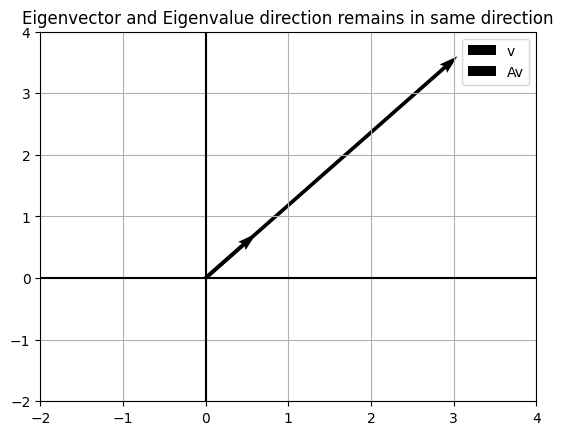

In [3]:
import matplotlib.pyplot as plt

v = eigenvec[:,0]
Av = A @ v

plt.axhline(0, color="black")
plt.axvline(0 , color="black")


# plot the qiuver plot
plt.quiver(0,0,v[0],v[1], angles="xy", scale_units="xy", scale=1, label="v")
plt.quiver(0,0,Av[0],Av[1], angles="xy", scale_units="xy", scale=1, label="Av")

plt.legend()
plt.xlim(-2,4)
plt.ylim(-2,4)
plt.grid()
plt.title("Eigenvector and Eigenvalue direction remains in same direction")
plt.show()


In [4]:
# applying to the PCA
from sklearn.datasets import load_iris
import numpy as np

X = load_iris().data

X_std = (X - X.mean(axis=0)) / X.std(axis=0)

cov = np.cov(X_std, rowvar=False)

eig_vals, eig_vecs = np.linalg.eig(cov)

print("Eigenvalues:\n", eig_vals)
print("\nEiganvectors (principal components):\n", eig_vecs)

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]

Eiganvectors (principal components):
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [5]:
explained_variance = eig_vals / eig_vals.sum()
explained_variance

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

## Gradient Descent

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X = np.linspace(0, 10, 50)
y = 3*X + 5 + np.random.randn(50)*2

In [7]:
# step 2 - initialize the params
m = 0
c = 0
lr = 0.01

# step 3 - Implement Gradient Descent loop
losses = []

for epoch in range(500):
  y_pred = m*X + c

  dm = (-2/len(X)) * np.sum(X * (y - y_pred))
  dc = (-2/len(X)) * np.sum(y - y_pred)

  # update weights
  m = m -lr*dm
  c = c - lr*dc

  # compute loss
  loss = np.mean((y - y_pred)**2)
  losses.append(loss)

print("Learned slope m:", m)
print("Learned intercept c:", c)

Learned slope m: 2.791232212001275
Learned intercept c: 6.201066048318193


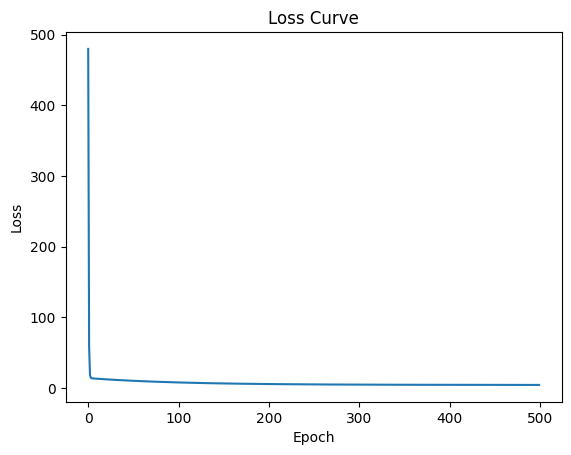

In [8]:
# plot the loss curve
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

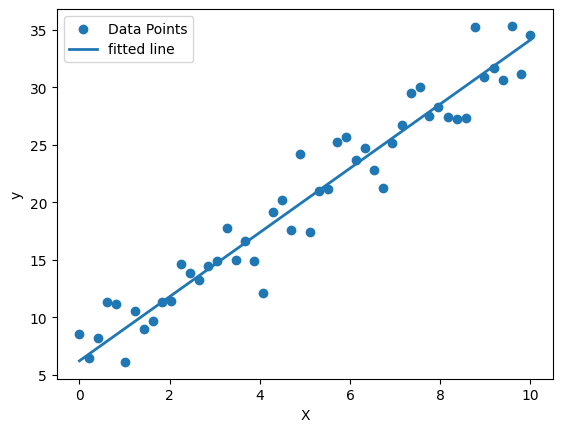

In [13]:
# visualize the fitted line
plt.scatter(X, y, label="Data Points")
plt.plot(X, m*X + c, label="fitted line", linewidth=2)
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## SGD compute

In [15]:
# compute the SGD
m, c = 0, 0
lr = 0.01
SGD_losses = []

for epoch in range(1000):
  i = np.random.randint(0, len(X))
  Xi = X[i]
  yi = y[i]

  y_pred = m*Xi + c

  # gradients
  dm = -2 * Xi * (yi - y_pred)
  dc = -2 * (yi - y_pred)

  m = m - lr*dm
  c = c - lr*dc

  # full dataset loss
  y_pred_loss = m*X + c
  loss = np.mean((y - y_pred_loss)**2)
  SGD_losses.append(loss)

print("Learned slope m:", m)
print("Learned intercept c:", c)

Learned slope m: 3.112224009998901
Learned intercept c: 6.904694418352389


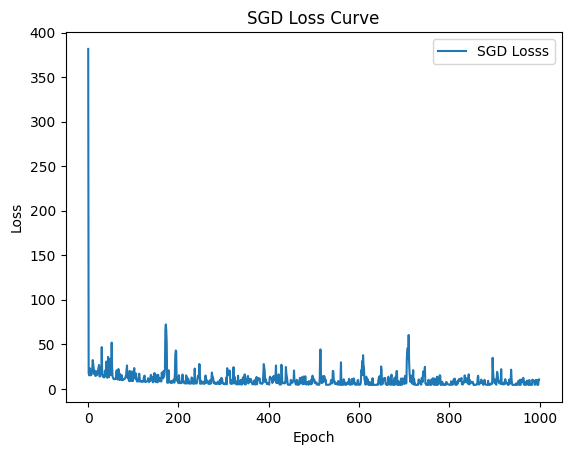

In [16]:
# plot the SGD losses
plt.plot(SGD_losses, label="SGD Losss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("SGD Loss Curve")
plt.legend()
plt.show()

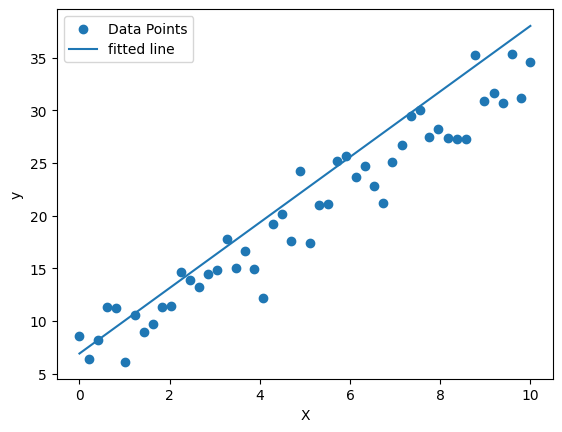

In [17]:
plt.scatter(X, y, label="Data Points")
plt.plot(X, m*X + c, label="fitted line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Mini batch gradient descent

In [27]:
m ,c = 0, 0
lr = 0.01
batch_size = 10
minibatch_losses = []

for eppoch in range(500):
  i = np.random.choice(len(X), size=batch_size, replace=False)
  Xi = X[i]
  yi = y[i]

  y_pred = m*Xi + c

  dm = (-2/batch_size) * np.sum(Xi * (yi - y_pred))
  dc = (-2/batch_size) * np.sum(yi - y_pred)

  m = m - lr*dm
  c = c - lr*dc

  y_pred_loss = m*X + c
  loss = np.mean((y - y_pred_loss)**2)
  minibatch_losses.append(loss)

print("Learned slope m:", m)
print("Learned intercept c:", c)

Learned slope m: 2.6549225110576367
Learned intercept c: 6.2412648768651415


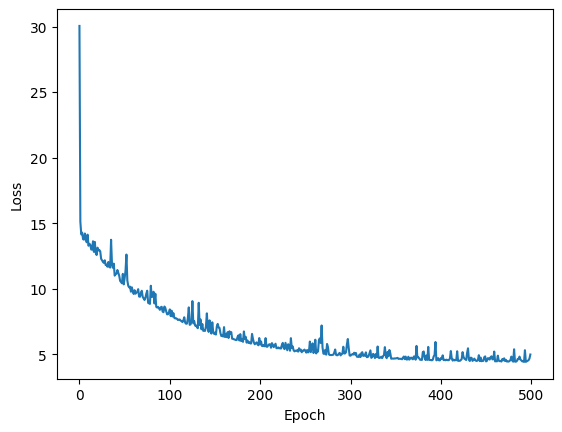

In [28]:
# plot the mini_batch loss
plt.plot(minibatch_losses, label="Mini-batch Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

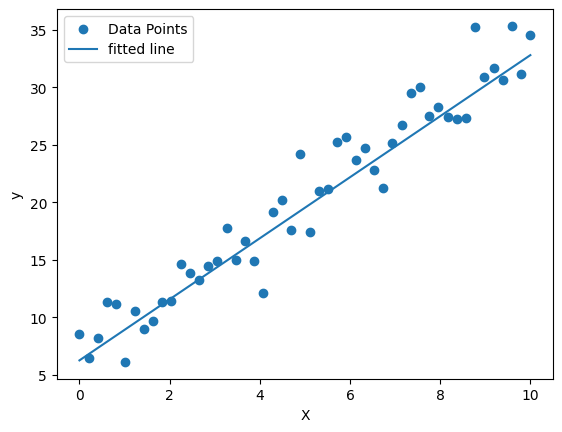

In [30]:
# plot the scatter plot of the predictions
plt.scatter(X, y, label="Data Points")
plt.plot(X, m*X + c, label="fitted line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Underfitting, overfitting and balanced
